In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

C:\Users\kushw\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [5]:
#describes the dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.describe().T

#transposes index & columns of the table

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
df.isnull()

#checks whether there are NULL values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

#sum of NULL values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<b> if there were any missing data:

for col in df.columns:
    
    if df[col].isnull().sum() > 0:
    
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

# Histogram
To visualise distribution of data with continuous values in columns of dataset.

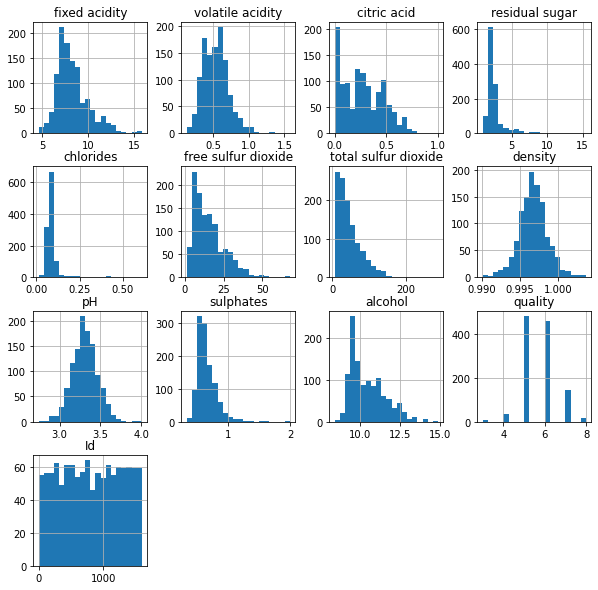

In [9]:
df.hist(bins = 20, figsize = (10,10))
plt.show()

# COUNT PLOT
To visualise number data of each quality of wine

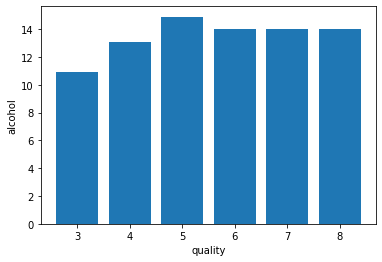

In [10]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# HEATMAP
To remove redundant features

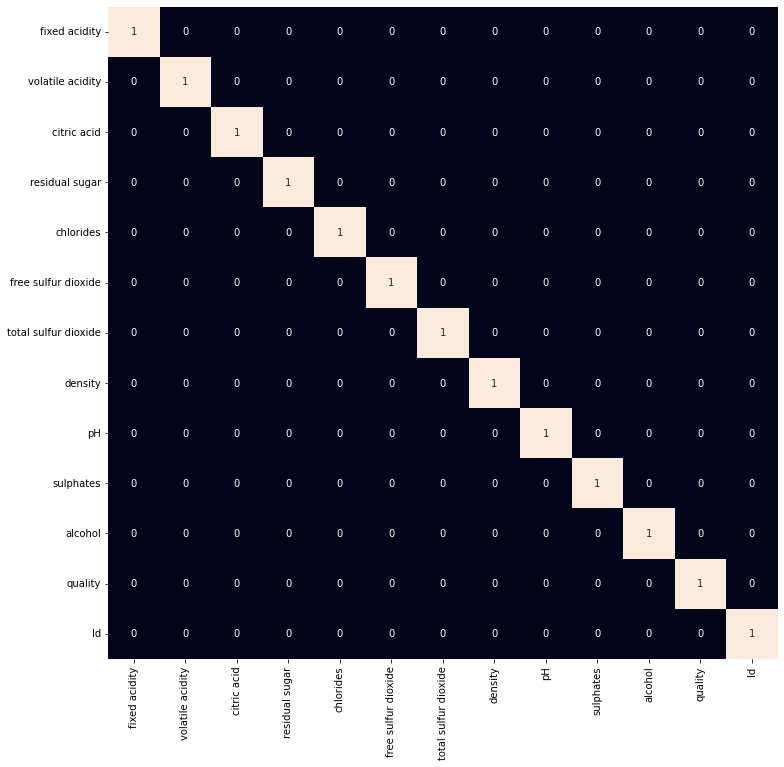

In [11]:
plt.figure(figsize=(12,12))
sb.heatmap(df.corr() > 0.7, annot = True, cbar=False)
plt.show()

# MODEL DEVELOPMENT
Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [12]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

We replace the column with 'object' data type with '0 and 1' as there are only two categories!

In [13]:
df.replace({'white': 1, 'red': 0}, inplace=True)

After segregating features & the target variable from the dataset, 
we split in into 80:20 for MODEL SELECTION.

In [14]:
features = df.drop(['quality', 'best quality'], axis =1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.2, random_state=40)

xtrain.shape, xtest.shape

((914, 12), (229, 12))

# NORMALISING THE DATA
Normalising the data before training helps us to achieve stable and fast training of the model.

In [15]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

As the data has been prepared completely,
let's train some state of the art machine learning model on it.

In [16]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)
    
    print(f'{models[i]}: ')
    print('Training Accuracy: ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy: ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression(): 
Training Accuracy:  0.7573006134969325
Validation Accuracy:  0.7523430178069354

[22:50:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
     

From the above accuarcies, we can say that

   <b> Logistic Regression and SVC performed better than XGBClassifier
    
on the validation data with less difference between the validation and training data.

# CONFUSION MATRIX
Plot confusion matrix for validation data using logistic regression model:

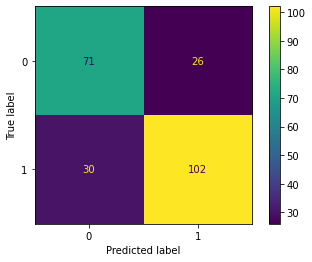

In [17]:
metrics.plot_confusion_matrix(models[0], xtest, ytest)
plt.show()

Plot confusion matrix for validation data using XGBClassifier model:

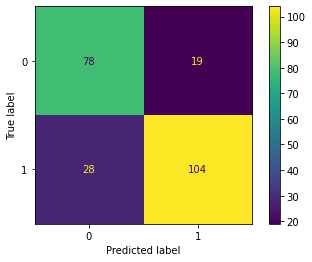

In [18]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

Plot confusion matrix for validation data using SVC model:

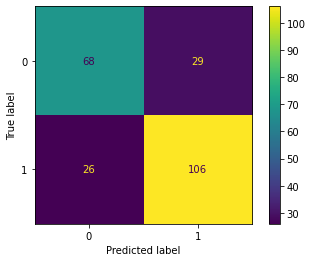

In [19]:
metrics.plot_confusion_matrix(models[2], xtest, ytest)
plt.show()

# CLASSIFICATION REPORT

Print classification report of linear regression model:

In [20]:
print(metrics.classification_report(ytest, models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        97
           1       0.80      0.77      0.78       132

    accuracy                           0.76       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.76      0.76       229



Print classification report of XGBCLassifier:

In [21]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        97
           1       0.85      0.79      0.82       132

    accuracy                           0.79       229
   macro avg       0.79      0.80      0.79       229
weighted avg       0.80      0.79      0.80       229



Print classification report of SVC model:

In [22]:
print(metrics.classification_report(ytest, models[2].predict(xtest)))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        97
           1       0.79      0.80      0.79       132

    accuracy                           0.76       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.76      0.76       229



Dataset used: Wine Quality Dataset, Kaggle
(https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

Authored by:
    Soumya Kushwaha